# Lab 1 - EDA on Avocado Prices

In [1]:
"""
Created on Wed Jun  15 20:22:18 2022

@author: konstantinoskalaitzidis
student_name =   "Konstantinos Kalaitzidis"
student_email =  "kon.kalaitzidis@gmail.com"
""" 

'\nCreated on Wed Jun  15 20:22:18 2022\n\n@author: konstantinoskalaitzidis\nstudent_name =   "Konstantinos Kalaitzidis"\nstudent_email =  "kon.kalaitzidis@gmail.com"\n'

## This is the first lab exercise of the Data Science for Health Informatics (DSHI) module of Stockholm University (2022). 

## Introductory information:
The dataset's domain of interest is the food industry. This dataset has been retrieved from [Kaggle](https://www.kaggle.com/datasets/neuromusic/avocado-prices?datasetId=30292&sortBy=voteCount) and contains 1 csv file. The file has a header that contains the labels of each column, and the values are separated by commas. The dataset is ready for analysis and doesn't include NaNs. It contains:
a) Features: 14 columns
b) Observations: 18249 rows 

## Importing Packages and Libraries

In [3]:
# Import the package with an alias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and familiarizing ourselves with the dataset

In [4]:
path = "/Users/pierre.le.merre/OneDrive - KI.SE/Mac/Desktop/Kostas/DSHI/Deliverable/avocado.csv"
df = pd.read_csv(path)

In [5]:
# What is the total size of the dataset?
df.shape

(18249, 14)

In [6]:
# Which are the variable types?
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [7]:
df.head(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [8]:
df.sample(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9505,15,2015-09-13,2.02,3992.43,327.06,1255.80,928.56,1481.01,1481.01,0.00,0.0,organic,2015,Charlotte
12868,51,2016-01-03,1.51,5895.92,95.21,4683.24,9.52,1107.95,624.60,483.35,0.0,organic,2016,HartfordSpringfield
2098,18,2015-08-23,1.26,405274.71,112710.34,233164.62,12415.75,46984.00,46984.00,0.00,0.0,conventional,2015,Sacramento


In [9]:
df.tail(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


# Data Preparation

In [11]:
# Sort our dataframe by date order
df = df.sort_values('Date')

In [12]:
df.head(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton


In [13]:
# We wish to see how the prices ranges over time on organic avocado products of all regions.

# Deleting irrelevant features
columns_to_delete = ["Unnamed: 0","Total Volume", "4046", "4225", "4770", "Total Bags", "Small Bags", "Large Bags", "XLarge Bags"]
# axis=1 means that the operation is executed in the columns, axis=0 is in the rows
df2 = df.drop(columns_to_delete, axis=1)    
df2

,Date,AveragePrice,type,year,region
11569,2015-01-04,1.75,organic,2015,Southeast
9593,2015-01-04,1.49,organic,2015,Chicago
10009,2015-01-04,1.68,organic,2015,HarrisburgScranton
1819,2015-01-04,1.52,conventional,2015,Pittsburgh
9333,2015-01-04,1.64,organic,2015,Boise
...,...,...,...,...,...
8574,2018-03-25,1.36,conventional,2018,Chicago
9018,2018-03-25,0.70,conventional,2018,SouthCentral
18141,2018-03-25,1.42,organic,2018,SouthCentral
17673,2018-03-25,1.70,organic,2018,California


In [14]:
df2.columns

Index(['Date', 'AveragePrice', 'type', 'year', 'region'], dtype='object')

In [15]:
df2 = df2[df2["type"]=="organic"]
df2.head(3)

,Date,AveragePrice,type,year,region
11569,2015-01-04,1.75,organic,2015,Southeast
9593,2015-01-04,1.49,organic,2015,Chicago
10009,2015-01-04,1.68,organic,2015,HarrisburgScranton


In [16]:
df2.shape

(9123, 5)

## Store processed data

In [17]:
import os

this_path = "."
folder_name = "data"
data_folder = os.path.join(this_path, folder_name)
os.makedirs(data_folder, exist_ok=True) # Check if the folder exists
data_folder

'./data'

In [18]:
file_name = "avocado_processed.csv"
filepath = os.path.join(data_folder, file_name)
filepath

'./data/avocado_processed.csv'

In [19]:
df2.to_csv(filepath, index=False)

# Exploratory Data Analysis (EDA)

In [20]:
data = pd.read_csv("./data/avocado_processed.csv")
data.head(3)

,Date,AveragePrice,type,year,region
0,2015-01-04,1.75,organic,2015,Southeast
1,2015-01-04,1.49,organic,2015,Chicago
2,2015-01-04,1.68,organic,2015,HarrisburgScranton


In [21]:
data.dtypes

Date             object
AveragePrice    float64
type             object
year              int64
region           object
dtype: object

In [22]:
data["type"] = data["type"].astype("category")
data.dtypes

Date              object
AveragePrice     float64
type            category
year               int64
region            object
dtype: object

In [23]:
data["region"] = data["region"].astype("category")
data.dtypes

Date              object
AveragePrice     float64
type            category
year               int64
region          category
dtype: object

In [24]:
# Show three random samples of the data
data.sample(3)

,Date,AveragePrice,type,year,region
7455,2017-08-27,1.40,organic,2017,Syracuse
8040,2017-11-05,1.82,organic,2017,TotalUS
3562,2016-04-03,1.73,organic,2016,RaleighGreensboro


## Understanding the data numerically

In [25]:
data.describe()

,AveragePrice,year
count,9123.000000,9123.000000
mean,1.653999,2016.147868
std,0.363502,0.939961
min,0.440000,2015.000000
25%,1.420000,2015.000000
50%,1.630000,2016.000000
75%,1.870000,2017.000000
max,3.250000,2018.000000


### Missing values

In [26]:
data.isnull().sum()

Date            0
AveragePrice    0
type            0
year            0
region          0
dtype: int64

# Answering simple questions about the dataset

### Question 1: Depict the regions with an average price of organic avocado of 75% of the max price or more in the year 2018. 

In [27]:
df_q1 = data[ (data["AveragePrice"]>1.86) & (data["year"]==2018)]
df_q1["region"].drop_duplicates()

8483             California
8484                 Boston
8494             Sacramento
8495               SanDiego
8496           SanFrancisco
8511    HartfordSpringfield
8527                NewYork
8545                StLouis
8550                Seattle
8581               LasVegas
8582       WestTexNewMexico
8653      RaleighGreensboro
8671           Jacksonville
8740              Charlotte
8843             LosAngeles
Name: region, dtype: category
Categories (54, object): ['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', ..., 'Tampa', 'TotalUS', 'West', 'WestTexNewMexico']

### Results show all regions where the average price of organic avocado is equal to 75% or more of the max price. 

### Question 2: What is the average organic avocado price for all regions?

In [28]:
df_q2 = data.groupby(by=["region"])["AveragePrice", "region"].mean()
df_q2

/var/folders/g6/vzx67_2s4r94c1spm2p3cxmc0000gp/T/ipykernel_3811/4222174075.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_q2 = data.groupby(by=["region"])["AveragePrice", "region"].mean()


,AveragePrice
region,
Albany,1.773314
Atlanta,1.607101
BaltimoreWashington,1.724260
Boise,1.620237
Boston,1.757396
BuffaloRochester,1.651361
California,1.685207
Charlotte,1.936982
Chicago,1.744201


### The results show all regions and their average price for organic avocado

### Question 3: What is the organic average avocado price for each year (2015-2018)

In [30]:
df_q3 = data.groupby(by="year")["AveragePrice", "region"].mean()
df_q3

/var/folders/g6/vzx67_2s4r94c1spm2p3cxmc0000gp/T/ipykernel_3811/3663035487.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_q3 = data.groupby(by="year")["AveragePrice", "region"].mean()


,AveragePrice
year,
2015,1.673324
2016,1.571684
2017,1.735521
2018,1.567176


### The results shows the average price of organic avocados for all regions per year

## Understanding the data graphically

### Histograms

<AxesSubplot:>

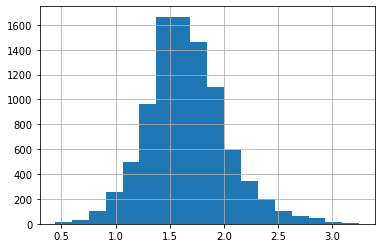

In [31]:
data["AveragePrice"].hist(bins=18)

/var/folders/g6/vzx67_2s4r94c1spm2p3cxmc0000gp/T/ipykernel_3811/3908968994.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_q3 = data.groupby(by="year")["AveragePrice", "region"].mean()


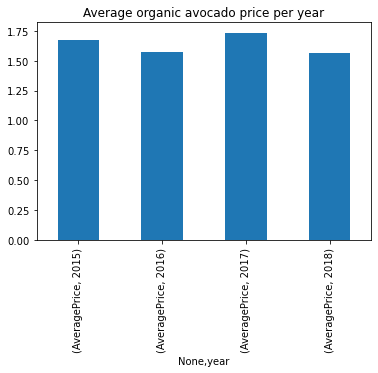

In [32]:
df_q3 = data.groupby(by="year")["AveragePrice", "region"].mean()
df_q3.unstack().plot.bar(stacked=True)

plt.title("Average organic avocado price per year")
plt.show()

# this plot shows the average organic avocado price per year

### Box plots

In [ ]:
# Useful to detect outliers in the dataset
plt.boxplot(data["AveragePrice"])
plt.show()

### Probability density function

In [ ]:
# Probability density function between year and average price
df_pivot = data.pivot(columns="year", values="AveragePrice")
df_pivot.plot.kde(legend=True)

In [ ]:
# Using Seaborn to visualize the distribution of the average prices of organic avocado across all regions.
plt.figure(figsize=(12,5))
plt.title("Distribution Price")
ax = sns.distplot(data["AveragePrice"], color = 'r')